# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# 2 EDA

### 2.1. Importing data and Understanding the Data Structure

In [2]:
red_wine_data = pd.read_csv("wine-quality red.csv")

In [3]:
red_wine_data.shape

(1599, 12)

In [4]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


df.head() gives us the first five records from this data

In [5]:
red_wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


df.tail() gives us last five rows of data

In [6]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


df.describe gives description about data

count = number of records

Std = Standard Deviation of data

Min = Minimum values of the attributes

25% , 50% , 75% = percentile values of the data

Max = Maximum values of the attributes of the data data

In [7]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 2.2 Handling Missing Values

In [9]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values 

### 2.3 Exploring Data Distribution


**Histograms and Density Plots** : These plots are generated to observe the distribution of each numeric variable, giving a sense of skewness and spread. KDE (Kernel Density Estimate) plots are overlaid on histograms for a smoother view.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22348\1070179627.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22348\1070179627.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22348\1070179627.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(red_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22348\1070179627.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

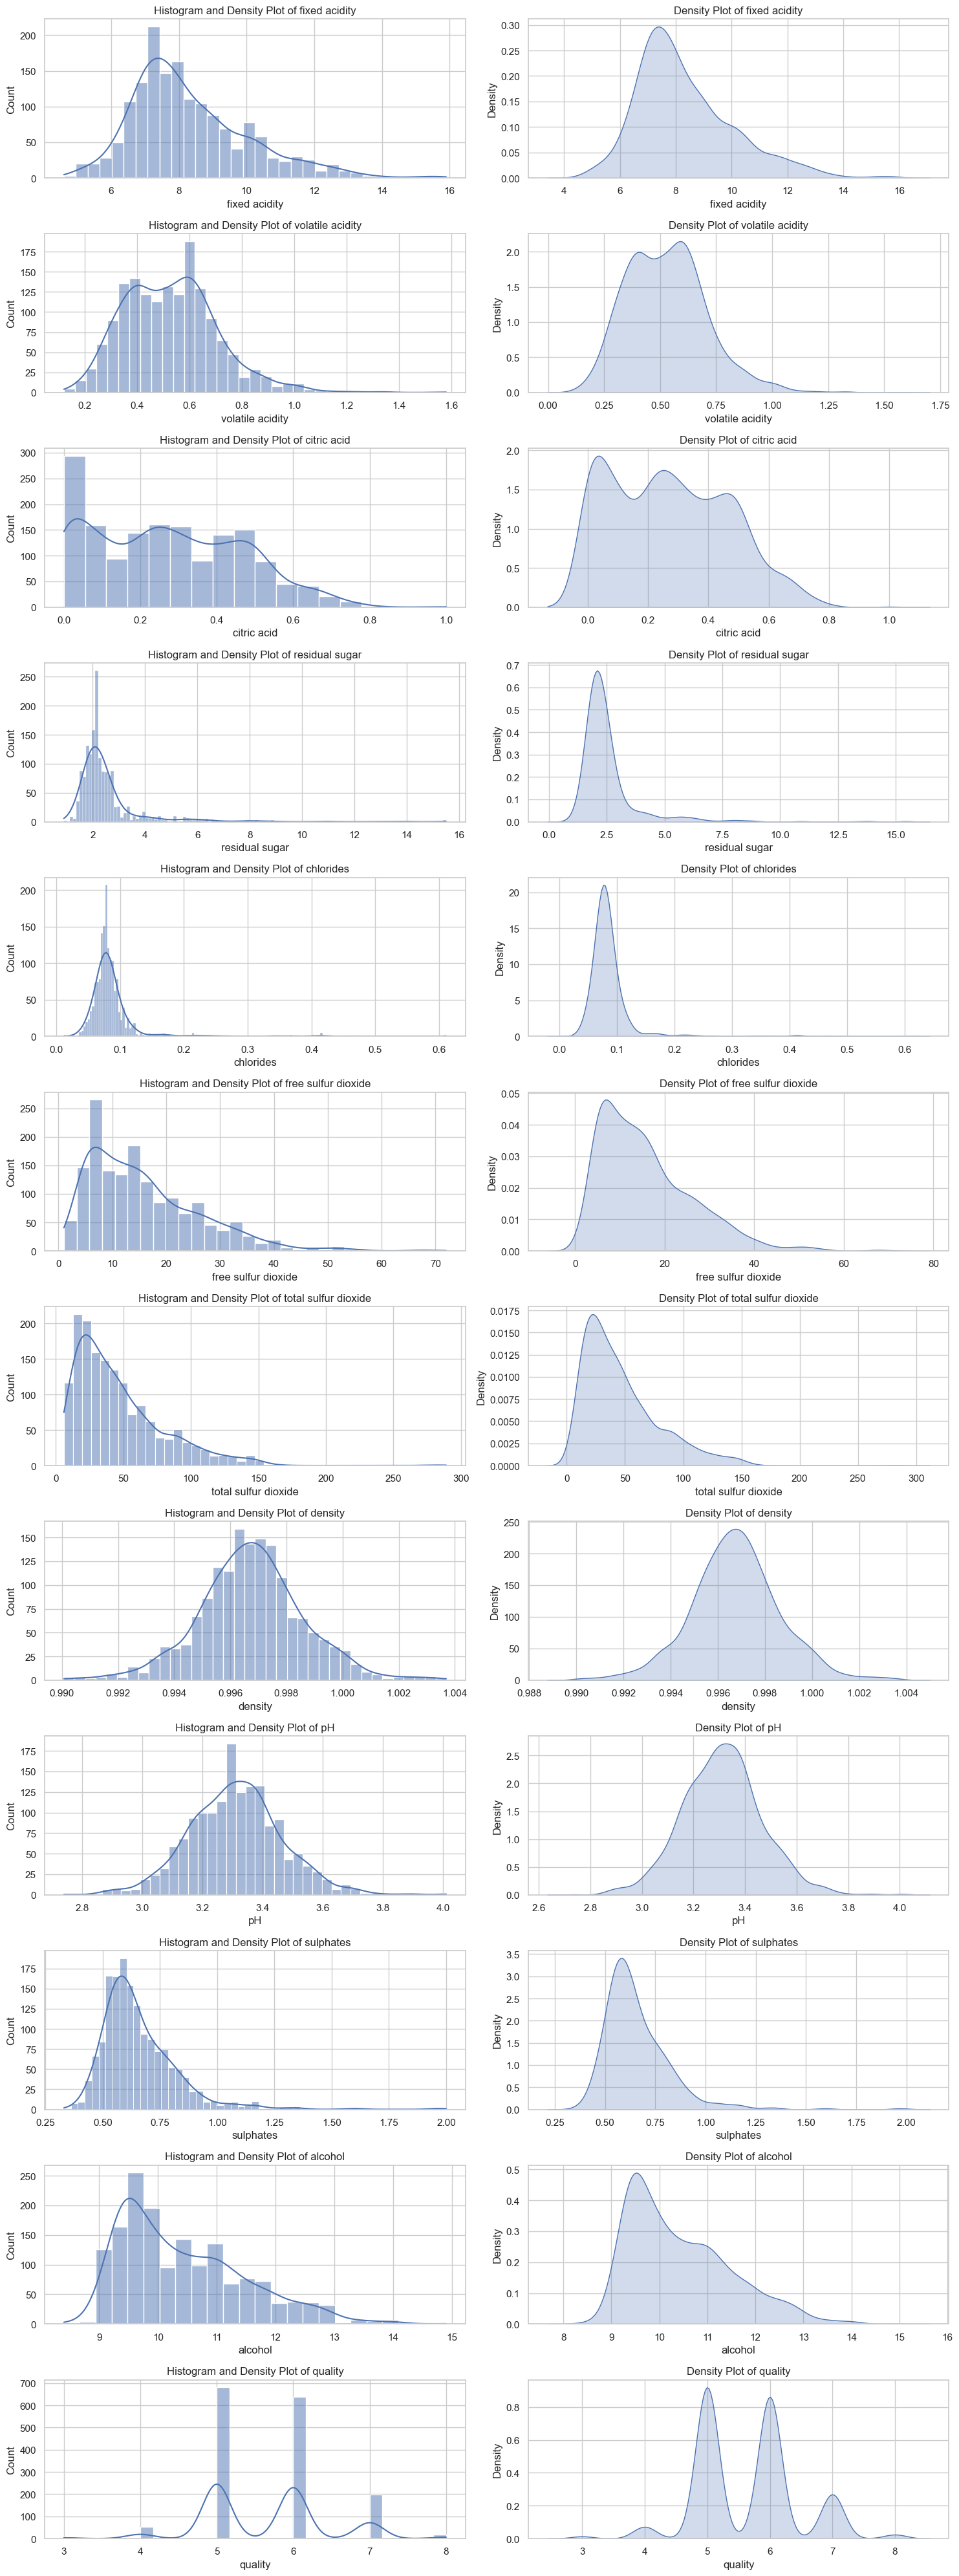

In [10]:
sns.set(style="whitegrid")

# Step 1: Histograms and Density Plots
numeric_columns = red_wine_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 40))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i * 2 - 1)
    sns.histplot(red_wine_data[column], kde=True)
    plt.title(f'Histogram and Density Plot of {column}')
    
    plt.subplot(len(numeric_columns), 2, i * 2)
    sns.kdeplot(red_wine_data[column], shade=True)
    plt.title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

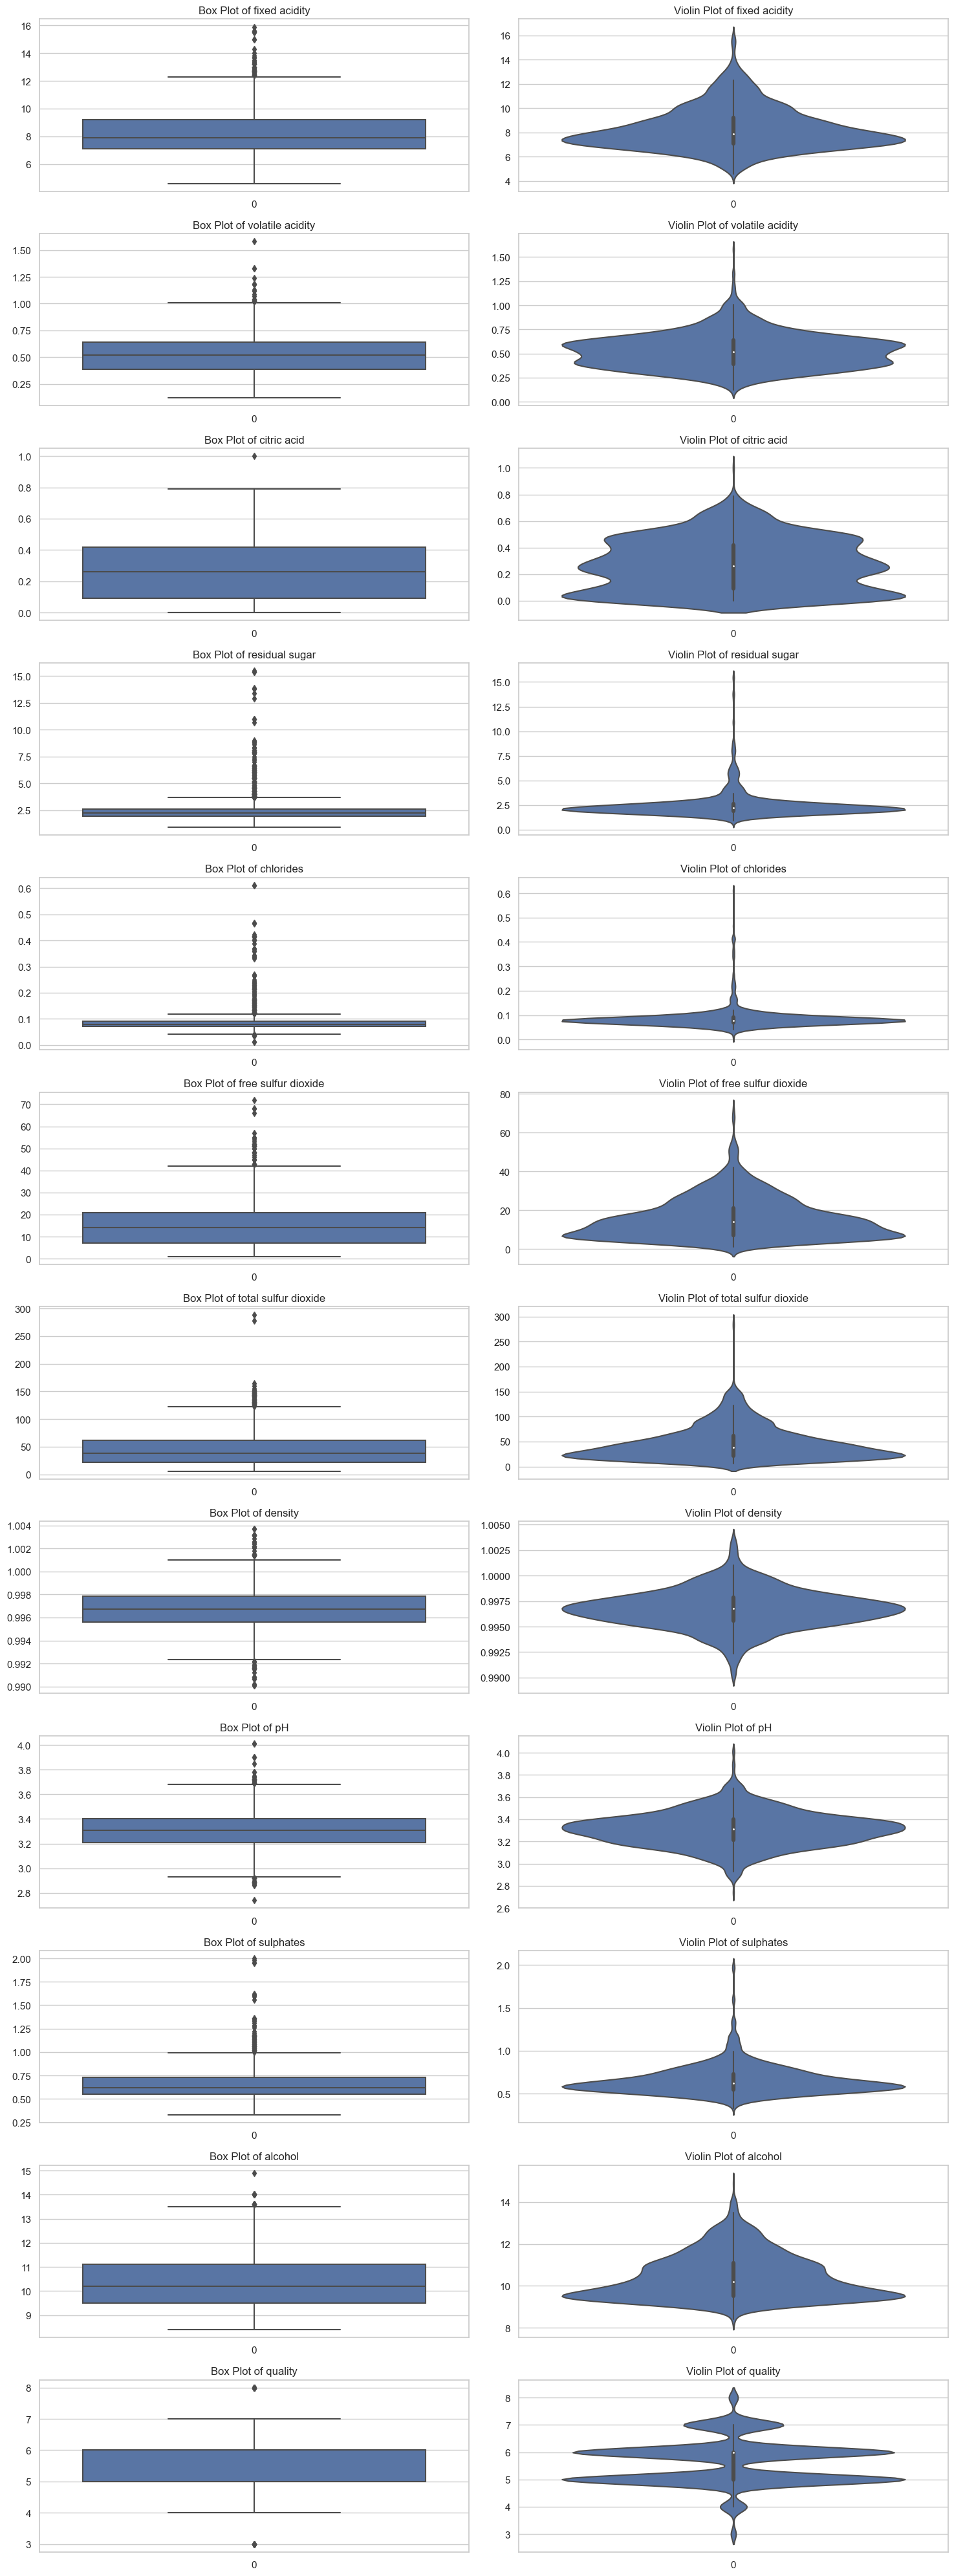

In [11]:
plt.figure(figsize=(15, 40))
#for i, column in enumerate(numeric_columns, 1,2):
j=1

for i in range (len(numeric_columns)):
    
    plt.subplot(len(numeric_columns) , 2, j)
    sns.boxplot(red_wine_data[numeric_columns[i]])
    plt.title(f'Box Plot of {numeric_columns[i]}')
    
    j=j+1
    
    plt.subplot(len(numeric_columns)  , 2,j)
    sns.violinplot(red_wine_data[numeric_columns[i]])
    plt.title(f'Violin Plot of {numeric_columns[i]}')
    
    j=j+1

plt.tight_layout()
plt.show()



**Fixed Acidity:**

Distribution is slightly right-skewed, with most values clustered around 7. There are some outliers, particularly at the high end, indicating a few wines with higher acidity levels, which can impact taste and preservation.

**Volatile Acidity:**

The distribution peaks around 0.5, with a strong right-skew. Numerous high outliers suggest that some wines contain unusually high volatile acidity, which can impart a sharper taste and affect wine quality.

**Citric Acid:**

Values mostly fall below 0.5, with a notable drop-off afterward. The box plot shows several outliers above 1.0, although these are uncommon, likely contributing to the wine’s freshness when present in moderation.

**Residual Sugar:**

Residual sugar is concentrated at the low end, mostly below 5, which is typical for red wines. A few outliers extend up to 15, suggesting the presence of some sweeter wines, but these are rare in the dataset.

**Chlorides:**

This feature is highly right-skewed, with most values under 0.1. There are numerous high outliers, indicating variability in salt levels, which may affect wine stability and taste.

**Free Sulfur Dioxide:**

Most values are under 50, showing a moderate right-skew, with some outliers reaching above 100. High sulfur dioxide levels are less common but indicate stronger preservation efforts in some wines.

**Total Sulfur Dioxide:**

Values are generally centered between 50 and 150, with a somewhat symmetric distribution. Outliers on both ends suggest variability in preservation practices.

**Density:**

The distribution is centered close to 1.0, typical for most wines, with only a few minor outliers. This consistency suggests that the wines have similar body characteristics, as density is closely related to alcohol and sugar content.

**pH:**

The majority of wines have a pH between 3.0 and 3.4, showing a mild right-skew. Outliers on both ends suggest a small range of acidity levels, which influences wine flavor and stability.

**Sulphates:**

Most values lie between 0.5 and 0.7, with a strong right-skew. The presence of high outliers indicates that some wines have increased sulphate levels, possibly to enhance preservation and microbial stability.

**Alcohol:**

Alcohol content is primarily between 9% and 12% ABV, with a mild right-skew. A few wines have higher alcohol content, though these are rare and may contribute to a bolder taste profile.

**Quality:**

Quality ratings are clustered around 5 to 6, suggesting that most samples are average in quality. The box plot shows isolated points for both high and low extremes, indicating a few exceptional wines (both positively and negatively).

### 2.4 Identifying Outliers

In [12]:
# Step 2: Z-score Method
# Outliers are identified using Z-scores; threshold typically set at |z| > 3
z_scores = np.abs(stats.zscore(red_wine_data[numeric_columns]))
outliers_zscore = (z_scores > 3).any(axis=1)
data_outliers_zscore = red_wine_data[outliers_zscore]

print("Outliers identified using Z-score method:")
print(data_outliers_zscore)

Outliers identified using Z-score method:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1505            6.7             0.760         0.02             1.8      0.078   
1558            6.9             0.630         0.33             6.7      0.235   
1570            6.4             0.360         0.53             2.2      0.230   
1574            5.6             0.310         0.78            13.9      0.074   
1589            6.6             0.725         0.20             7.8 

### Z-score Analysis

Using the Z-score method with a threshold of |z| > 3, we identified 148 rows as outliers in the dataset. Here’s an updated breakdown of these outliers:

**Outlier Prevalence:**

A notable portion of the dataset contains outliers, suggesting substantial variability across some features. These outliers span multiple attributes, reflecting the diverse chemical compositions and characteristics present in different wine samples.

**Attributes with Frequent Outliers:**

Alcohol and Chlorides: Many outliers are found in these columns, indicating some wines have exceptionally high or low levels. Variations in alcohol and chloride levels can significantly influence the taste, body, and preservation of the wine.

Total and Free Sulfur Dioxide: Outliers are prevalent in sulfur dioxide levels, possibly indicating differences in preservation practices among wines. High sulfur dioxide levels are typically associated with longer shelf life and reduced microbial activity.

Fixed and Volatile Acidity: Outliers in acidity are also present and may impact taste profiles. Wines with high or low acidity levels can offer different flavor notes, ranging from sharp and crisp to smoother, rounder profiles.

**Quality Ratings:**

Outliers appear across various quality ratings, suggesting that deviations in chemical composition do not uniformly affect wine quality. However, higher alcohol levels are commonly found in wines rated closer to 6, potentially hinting at a relationship between alcohol content and quality perception.

**Potential Influence on Wine Profiles:**

The presence of outliers in sulfur dioxide, alcohol, and acidity likely affects the overall taste, aroma, and preservation characteristics of these wines. For instance, wines with high residual sugar could be notably sweeter, catering to dessert wine profiles, while higher alcohol levels may provide a bolder flavor profile suited to specific wine styles.

### Reasons to Keep Outliers

**Reflecting Real-World Variability:**
In the wine industry, there is natural variability in chemical compositions (e.g., acidity, sulfur dioxide levels, alcohol content) due to different production methods, grape types, and regional practices. Outliers may represent this authentic diversity and could be valuable if you want to understand the complete range of wines.

**Potential Insights:**
Outliers might highlight unique wines that cater to specific consumer preferences, such as wines with high residual sugar for sweetness or high alcohol content. Retaining them allows you to analyze wines with atypical profiles and understand factors that may influence quality ratings in unusual cases.

**Risk of Bias:**
Removing outliers could result in a biased understanding, as wines with certain characteristics might be overrepresented or underrepresented. For instance, high-quality, high-alcohol wines could be disproportionately removed if high alcohol levels are considered outliers, leading to skewed insights into quality factors.

**Small Dataset Impact:**
If the dataset is relatively small, removing a large number of outliers (148 rows in this case) could significantly reduce the sample size, which may affect the robustness and reliability of the analysis.

### 2.5. Exploring Relationships between Variables

In [13]:
correlation_matrix = red_wine_data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


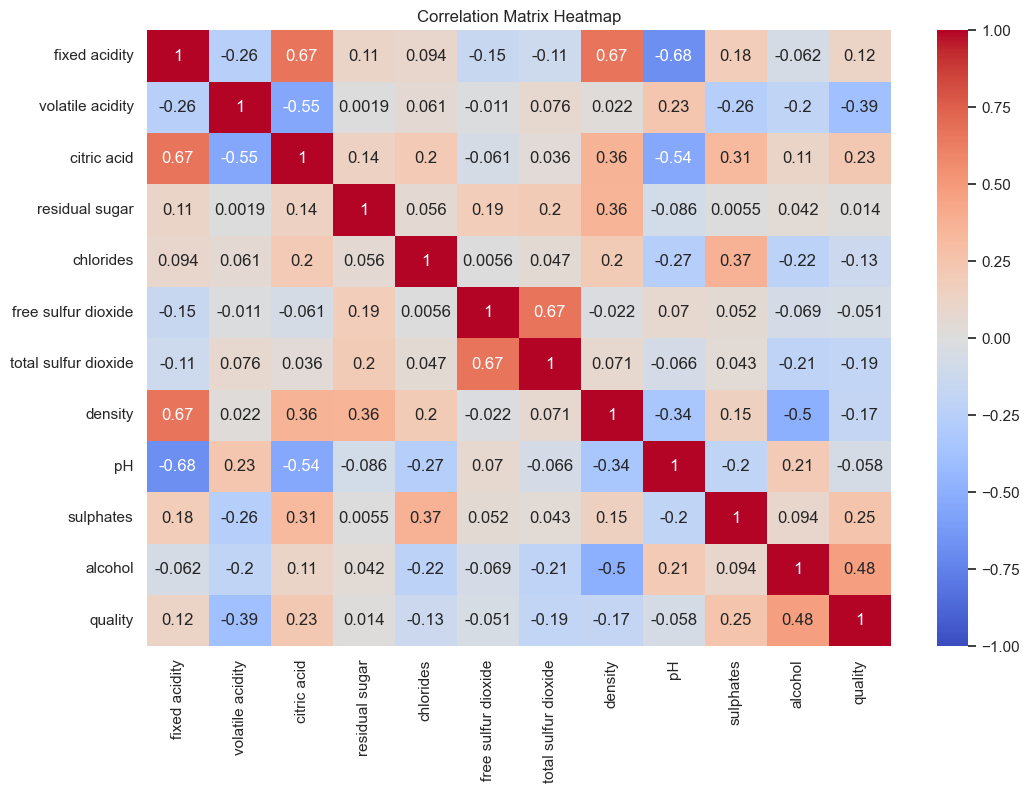

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

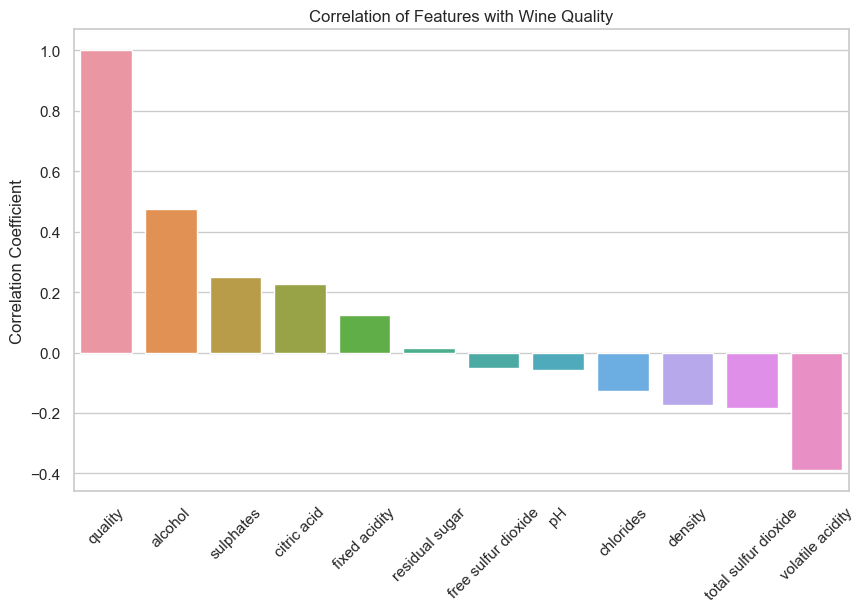

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [15]:
# Focusing on correlations with the 'quality' column
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)

# Plotting the correlations with quality
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_correlations.index, y=quality_correlations.values)
plt.xticks(rotation=45)
plt.title('Correlation of Features with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.show()

# Display the correlation values for further inspection
quality_correlations

### Correlation Matrix Analysis

The correlation matrix reveals relationships between various features in the wine quality dataset, with correlation values ranging from -1 (indicating a perfect negative correlation) to +1 (indicating a perfect positive correlation). Key insights include:

**Quality:**

Alcohol shows a moderately positive correlation with quality (0.476), indicating that wines with higher alcohol content are generally rated higher in quality.
Sulphates and Citric Acid both have weaker positive correlations with quality (0.251 and 0.226, respectively), suggesting that higher levels of these compounds may be associated with higher quality ratings.
Fixed Acidity has a low positive correlation with quality (0.124), indicating that it has minimal influence on quality ratings.
Residual Sugar has a very weak positive correlation (0.014), suggesting that sweetness has little impact on quality perception.
Volatile Acidity has a notable negative correlation with quality (-0.391), indicating that higher volatile acidity, which can contribute to a harsh taste, may lower quality ratings.
Density (-0.175) and Chlorides (-0.129) also show negative correlations with quality, implying that denser wines or those with higher chloride content are often rated lower.

**Alcohol:**

Density has a strong negative correlation with alcohol content (-0.780), as expected, since alcohol is less dense than water. Higher alcohol levels are thus associated with lower density in wine.
There are moderate negative correlations with Total Sulfur Dioxide (-0.185) and Residual Sugar, potentially suggesting drier wines with higher alcohol content are lower in sulfur dioxide and residual sugar.

**Density:**

Residual Sugar shows a strong positive correlation with density (0.839), indicating that sweeter wines are denser, which is typical since sugar increases a liquid's density.
Total Sulfur Dioxide also has a moderate positive correlation with density (0.530), suggesting that denser wines may have higher preservative levels.

**Total Sulfur Dioxide and Free Sulfur Dioxide:**

There is a strong positive correlation between Free Sulfur Dioxide and Total Sulfur Dioxide (0.616), as expected, because free sulfur dioxide is a component of the total amount.
Total sulfur dioxide also has a moderate positive correlation with Density (0.530), suggesting wines with more preservatives may tend to be denser.

**pH:**

Fixed Acidity and pH are negatively correlated (-0.426), aligning with the fact that higher acidity typically lowers pH in wine.
There are weaker correlations between pH and Sulphates (0.156) as well as Citric Acid (-0.164), indicating minor relationships with acidity and preservative levels.


# 2 Influential Features

In [16]:
# Assume 'quality' is the target and separate it
X = red_wine_data.drop(columns='quality')
y = red_wine_data['quality']

In [17]:
# Method 2: Mutual Information
# Calculate mutual information between features and target
mutual_info = mutual_info_classif(red_wine_data.drop(columns='quality'), red_wine_data['quality'])
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

print("Mutual Information Scores:")
print(mutual_info_series)


Mutual Information Scores:
alcohol                 0.186649
volatile acidity        0.131243
sulphates               0.108331
density                 0.088632
total sulfur dioxide    0.062729
citric acid             0.053437
chlorides               0.052209
fixed acidity           0.049109
free sulfur dioxide     0.034234
residual sugar          0.027787
pH                      0.000333
dtype: float64


**Mutual Information** : Measures dependency between each feature and the target. A higher score indicates a stronger association. This method is non-parametric and can capture non-linear relationships.



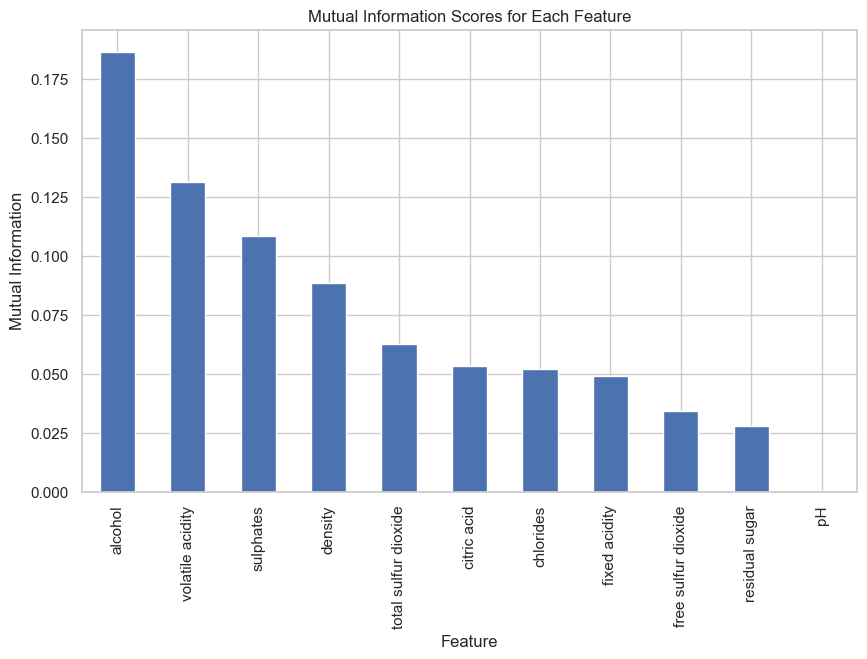

In [18]:
# Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title("Mutual Information Scores for Each Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Feature")
plt.show()


The Mutual Information plot illustrates the importance of different features with respect to predicting the target variable, likely the "quality" of the wine in this context. Mutual Information (MI) measures the dependency between variables, with higher values indicating a stronger relationship with the target. Here’s an analysis based on the plot:

**Top Influential Features:**

**Density** and **Alcohol** show the highest Mutual Information scores, suggesting they have the strongest relationship with wine quality. This makes sense, as both alcohol content and density often influence the perceived body and quality of wine.
**Dioxide (likely sulfur dioxide)** also has a notable MI score. Sulfur dioxide levels, particularly total and free forms, are important in preserving wine, influencing taste and aroma, and potentially impacting wine quality.

**Moderately Important Features:**

**Residual Sugar** and **Chlorides** also show moderate MI scores, indicating a fair impact on wine quality. Residual sugar can affect sweetness, which can be desirable or undesirable depending on the wine style, while chlorides (salt content) might influence taste balance.
**Citric Acid** and **Fixed Acidity** contribute to the wine’s acidity and freshness, which can affect the overall tasting profile and quality but are less impactful than alcohol or density in this dataset.

**Lower Influential Features:**

**pH** and **Sulphates** have lower MI scores, suggesting a relatively weaker direct relationship with wine quality in this dataset. While pH affects acidity, it appears to be less predictive of quality compared to density or alcohol.
**Volatile Acidity** and **Fixed Acidity** have the lowest scores, which may indicate that, in this dataset, they don’t play as significant a role in determining wine quality directly.

# 3 Dimensionality Reduction: 

In [19]:
# Assume 'quality' is the target and separate it
X = red_wine_data.drop(columns='quality')
y = red_wine_data['quality']

In [20]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


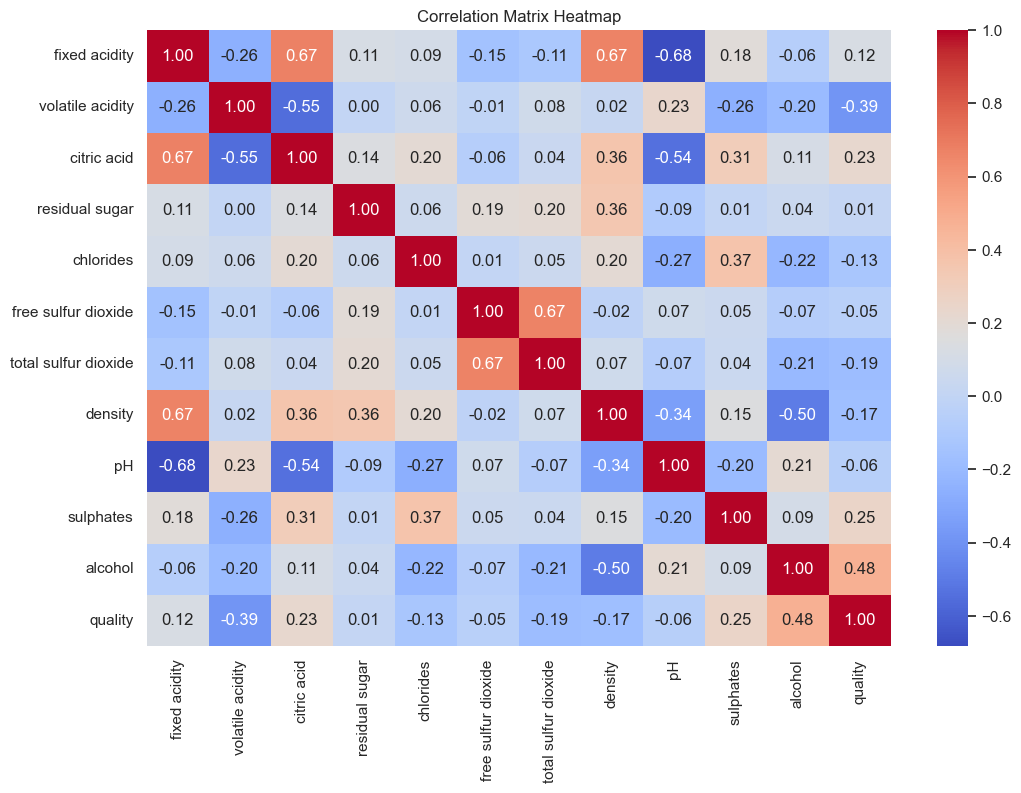

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

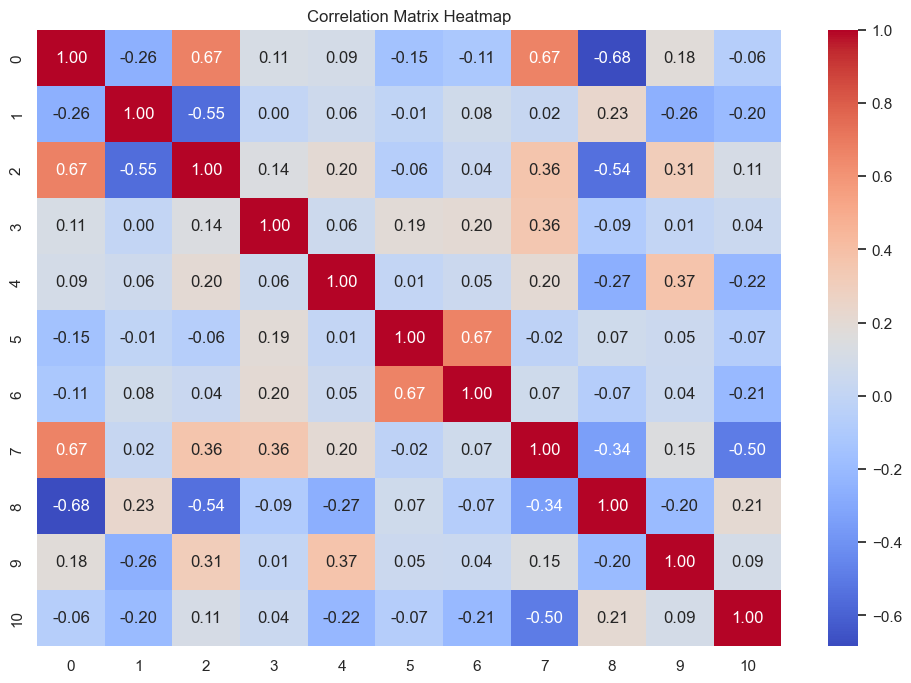

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Clustering

In [25]:
# Step 1: Principal Component Analysis (PCA)
# Reduce to 2 components for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

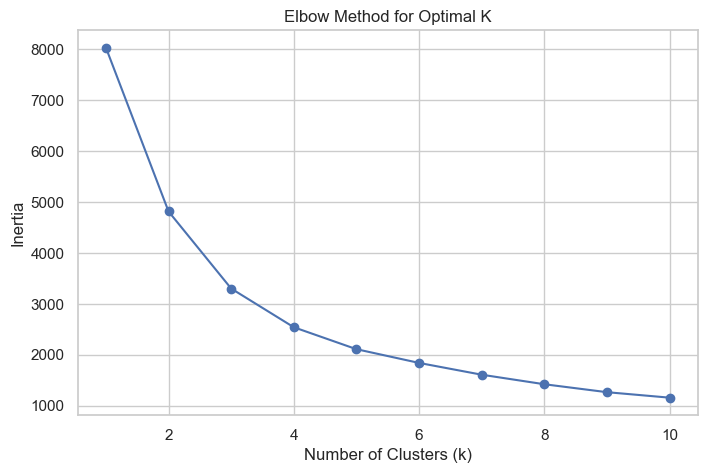

In [26]:
# Using the elbow method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


### Elbow Method Concept:

The elbow method plots the within-cluster sum of squares (often called "inertia") as a function of the number of clusters 
𝑘.

The goal is to identify the "elbow point," where adding more clusters starts to yield diminishing returns (i.e., the rate of decrease in inertia slows down).

**Interpretation of the Elbow:**

In this plot, there is a noticeable decrease in inertia from 𝑘=1 to 𝑘=3, with a gradual tapering off afterward.
The curve starts to flatten after 𝑘=3 or k=4, indicating that adding more clusters beyond this point doesn't significantly reduce inertia.

**Optimal k Value:**

k=3 would provide a simpler model with fewer clusters, while 

k=4 may capture more nuances in the data, though at the cost of added complexity.

In [27]:
# Step 1: Apply KMeans
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


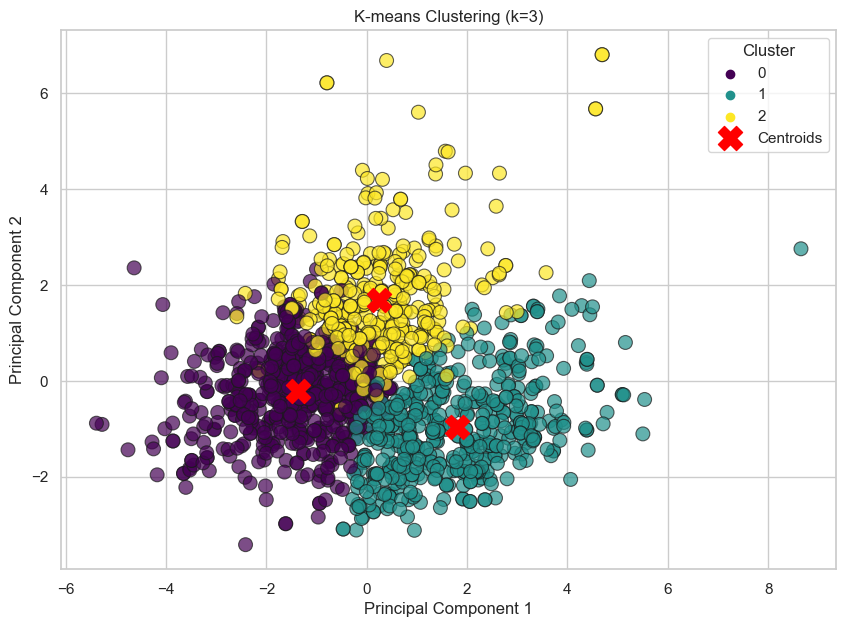

In [28]:
# Step 3: Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', label='Centroids', marker='X')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


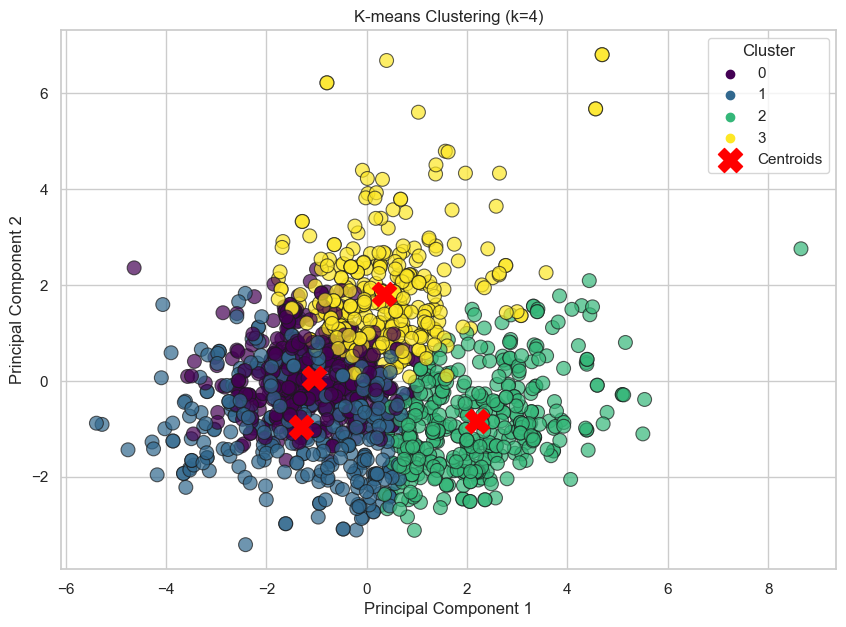

In [29]:
# Step 1: Apply KMeans
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', label='Centroids', marker='X')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Clutering analysis
3 clsuters are cleary visible hence optimil k is 3

### PCA

### Analysis

**Principal Component Analysis (PCA):**

The plot uses two principal components derived from the original features. These components capture the maximum variance possible in two dimensions, allowing us to view the structure of the dataset more easily.
Principal Component 1 and Principal Component 2 don’t directly represent any specific original features but are combinations of them, optimized to spread out the data points as much as possible.


In [31]:
# Explained Variance Ratio for each principal component
print("Explained Variance Ratio by each PCA component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio by each PCA component:
[0.28173931 0.1750827 ]


Variance ratio indicates how much of the total variance (or "information") in the dataset is captured by each principal component in PCA. In your case:

Principal Component 1 explains about 28.31% of the variance.

Principal Component 2 explains about 17.5% of the variance.

Together, these two components account for approximately 45.6% of the total variance in the dataset.

# Model Traning

### Random Forest Regressor
Used for regression tasks where the goal is to predict a continuous value.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_ev = explained_variance_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R²):", rf_r2)
print("Explained Variance Score:", rf_ev)

Random Forest Regression Results:
Mean Absolute Error (MAE): 0.42196875
Mean Squared Error (MSE): 0.3013528125
Root Mean Squared Error (RMSE): 0.5489561116337079
R-squared (R²): 0.5388674666387723
Explained Variance Score: 0.539077608750878


In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression Model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_ev = explained_variance_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R-squared (R²):", lr_r2)
print("Explained Variance Score:", lr_ev)


Linear Regression Results:
Mean Absolute Error (MAE): 0.5035304415524375
Mean Squared Error (MSE): 0.39002514396395493
Root Mean Squared Error (RMSE): 0.624519930798013
R-squared (R²): 0.4031803412796219
Explained Variance Score: 0.40484356627137186


In [35]:
# Step 3: Train the SVM Regressor
svm_model = SVR(kernel='rbf')  # You can also experiment with 'linear' or 'poly' kernels
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 5: Evaluate the model
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, y_pred_svm)
svm_ev = explained_variance_score(y_test, y_pred_svm)

print("SVM Regression Results:")
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Squared Error (MSE):", svm_mse)
print("Root Mean Squared Error (RMSE):", svm_rmse)
print("R-squared (R²):", svm_r2)
print("Explained Variance Score:", svm_ev)

SVM Regression Results:
Mean Absolute Error (MAE): 0.45396323678666234
Mean Squared Error (MSE): 0.35160700390834715
Root Mean Squared Error (RMSE): 0.5929645890846663
R-squared (R²): 0.46196809276566075
Explained Variance Score: 0.4654323948382332


In [36]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# Calculating evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_ev = explained_variance_score(y_test, y_pred_xgb)

# Displaying the evaluation results
print("XGBoost Regression Results:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R²):", xgb_r2)
print("Explained Variance Score:", xgb_ev)

XGBoost Regression Results:
Mean Absolute Error (MAE): 0.4618418917059898
Mean Squared Error (MSE): 0.3512391276737155
Root Mean Squared Error (RMSE): 0.5926543070574241
R-squared (R²): 0.4625310199825391
Explained Variance Score: 0.4634557044881431


**What it Means: R²**, or the coefficient of determination, indicates the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with values closer to 1 indicating that the model explains more of the variance and is therefore a better fit.

**What it Means: MAE** provides the average absolute difference between predicted and actual values, giving a straightforward interpretation of error in the same units as the target variable.

**What it Means: RMSE** measures the square root of the average squared errors, making it more sensitive to larger errors.


MAE and RMSE are useful to understand how close the predictions are to the actual values in terms of average error.

Explained Variance can complement R² and is helpful to assess the model’s explanatory power, especially if R² is low.

### Define Hyperparameter Grid and Perform Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
# Define the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 1]  # L2 regularization
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 1.0}


### Train the Model with Optimal Hyperparameters

In [38]:
# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = best_xgb_model.predict(X_test)


### Evaluate the Model

In [39]:
# Calculating evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_ev = explained_variance_score(y_test, y_pred_xgb)

# Displaying the evaluation results
print("\nXGBoost Regression Results with Hyperparameter Tuning:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R²):", xgb_r2)
print("Explained Variance Score:", xgb_ev)



XGBoost Regression Results with Hyperparameter Tuning:
Mean Absolute Error (MAE): 0.44916036278009414
Mean Squared Error (MSE): 0.347641052886717
Root Mean Squared Error (RMSE): 0.589610933486411
R-squared (R²): 0.4680368233894736
Explained Variance Score: 0.46895504252408293


### Hyperparamter tunning of Random Forest

In [40]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],              # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],     # Number of features to consider for the best split
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE for scoring
    n_jobs=-1,                  # Use all available cores
    verbose=2
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Train the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
rf_mse_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rf_rmse_tuned = np.sqrt(rf_mse_tuned)
rf_mae_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rf_r2_tuned = r2_score(y_test, y_pred_rf_tuned)
rf_ev_tuned = explained_variance_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Regression Results:")
print("Mean Absolute Error (MAE):", rf_mae_tuned)
print("Mean Squared Error (MSE):", rf_mse_tuned)
print("Root Mean Squared Error (RMSE):", rf_rmse_tuned)
print("R-squared (R²):", rf_r2_tuned)
print("Explained Variance Score:", rf_ev_tuned)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
358 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Saurabh\anaconda3\Lib\

Best parameters found by GridSearchCV: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Tuned Random Forest Regression Results:
Mean Absolute Error (MAE): 0.41539776204681067
Mean Squared Error (MSE): 0.29240619943616986
Root Mean Squared Error (RMSE): 0.5407459657141881
R-squared (R²): 0.5525576469722531
Explained Variance Score: 0.5527343965040408


# Model Interpretations

### Random Forest Regression

**Strong Performance:**

The base Random Forest model achieves good results, with 

low MAE (0.4220),

MSE (0.3014), 

and RMSE (0.5490).

It explains 53.9% of the variance in the target variable (R²: 0.5389, Explained Variance: 0.5391).

**Conclusion:** Random Forest is a reliable model, but it improves significantly after hyperparameter tuning.

### Tuned Random Forest Regression

**Best Overall Model:**

Hyperparameter tuning improves performance further:

MAE: Reduced to 0.4154 from 0.4220.

MSE: Decreased to 0.2924 from 0.3014.

RMSE: Reduced to 0.5407 from 0.5490.

**Variance Explained:** It achieves the highest R² (0.5526) and Explained Variance (0.5527), outperforming all other models.

**Conclusion:** Tuned Random Forest is the best-performing model for this dataset, with superior accuracy and generalization.

### Linear Regression

**Weak Performance:**

Linear Regression has the highest error metrics:

MAE: 0.5035 (worst among all models).

MSE: 0.3900 (significantly higher than ensemble methods).

RMSE: 0.6245 (largest error magnitude).

**Variance Explained:** The R² (0.4032) and Explained Variance (0.4048) are the lowest, indicating poor performance.

**Conclusion:** Linear Regression is unsuitable for this dataset due to its inability to model complex patterns.

### SVM Regression

**Moderate Performance:**

SVM shows improvement over Linear Regression but is still outperformed by Random Forest and XGBoost:
MAE: 0.4540, MSE: 0.3516, RMSE: 0.5930.

**Variance Explained:** R² (0.4620) and Explained Variance (0.4654) indicate moderate explanatory power.

**Conclusion:** SVM provides acceptable performance but falls short of ensemble methods.

### XGBoost Regression

**Competitive Performance:**

XGBoost performs slightly better than SVM, with similar error metrics:
MAE: 0.4618, MSE: 0.3512, RMSE: 0.5927.

**Variance Explained:** R² (0.4625) and Explained Variance (0.4635) indicate solid results.

**Conclusion:** XGBoost is a strong alternative, though further improvement can be achieved with hyperparameter tuning.

### XGBoost (Hyperparameter Tuning)

**Notable Improvement:**

Hyperparameter tuning enhances XGBoost’s performance:

MAE: Reduced to 0.4492 from 0.4618.

MSE: Decreased to 0.3476 from 0.3512.

RMSE: Reduced to 0.5896 from 0.5927.

**Variance Explained:** With R² (0.4680) and Explained Variance (0.4690), it closely approaches the performance of Random Forest models.

**Conclusion:** Tuned XGBoost is a competitive alternative, though it still trails behind Tuned Random Forest.